In [10]:
# torch related modules and libraries
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# other
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

# custom modules and libraries
from context import LocalLearning

plt.style.use(['seaborn-paper', "./PRLDoubleCol.mplstyle"])

In [2]:
if torch.cuda.is_available():
    dev = torch.device('cuda')
    print(f"Cuda available, choose device: {dev}")
else:
    dev = torch.device('cpu')
    print(f"Cuda unavailable, choose device: {dev}")

Cuda available, choose device: cuda


In [15]:
test_data = datasets.MNIST(
    root="../data/MNIST",
    train=False,
    transform=ToTensor(),
)

dlTest = DataLoader(
    test_data,
    batch_size=100,
    num_workers=4,
    shuffle=False,
)

# Local Learning Training

# Local Learning Encodings and Weights

In [13]:
# load the trained local learning model
trained_params_path = Path("../data/models/NoNormMNIST_LL/mnist_5.pth")
trained_model_state = torch.load(trained_params_path)
llparams = trained_model_state["model_parameters"]
llmodel = LocalLearning.FKHL3(llparams)
llmodel.load_state_dict(trained_model_state["model_state_dict"])
llmodel.to(dev)
llmodel.eval()

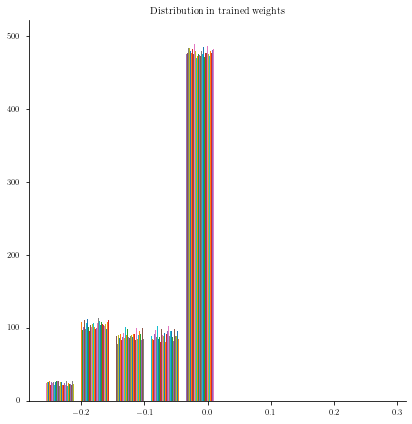

In [14]:
# weight_distribution

fig, ax = plt.subplots()
p_iter = llmodel.parameters()
llweigths = next(p_iter)
ax.hist(llweigths.detach().cpu().numpy())
ax.set_title("Distribution in trained weights")
fig.show()

/home/konstantin/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch/_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


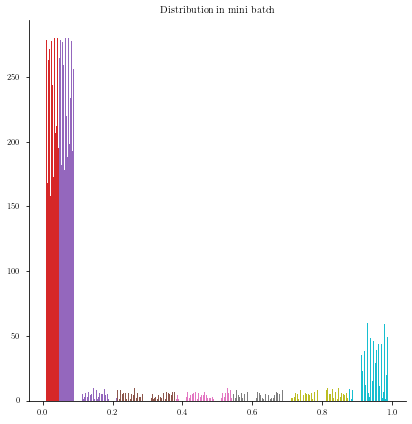

In [22]:
# dataset distribution
data_iter = iter(dlTest)
features, labels = next(data_iter)
features.size()

fig, ax = plt.subplots()
ax.hist(features.resize(280, 280).detach().cpu().numpy())
ax.set_title("Distribution in mini batch")
fig.show()

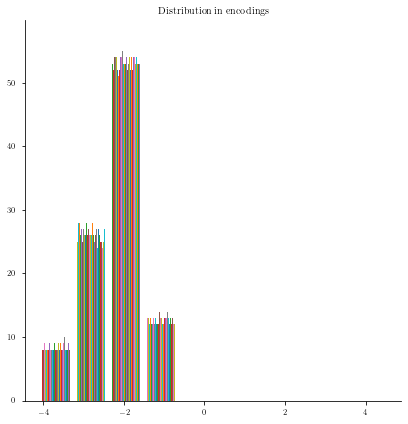

In [24]:
# encodings
preds = llmodel(features.to(dev))
fig, ax = plt.subplots()
ax.hist(preds.detach().cpu().numpy())
ax.set_title("Distribution in encodings")
fig.show()